In [1]:
import numpy as np
import pandas as pd

In [9]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [10]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
df = pd.read_csv("/content/Combined Data - Combined Data.csv")

In [12]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [13]:
df["status"].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


In [14]:
df.isna().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [15]:
df.dropna(inplace=True)

In [16]:
word_list=[]
for i in df["statement"]:
  word_list.append(word_tokenize(i))

In [17]:
df["word"]=word_list

In [18]:
no_punct=[]
for i in df["statement"]:
  no_punct.append(RegexpTokenizer(r"\w+").tokenize(i))

In [19]:
df["no_punct_word"]=no_punct

In [20]:
word_lower=[]
for i in df["no_punct_word"]:
  word_lower_row=[]
  for j in i:
    word_lower_row.append(j.lower())
  word_lower.append(word_lower_row)

In [21]:
df["word_lower"]=word_lower

In [22]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
no_stopword=[]
for i in df["word_lower"]:
  word_row=[]
  for j in i:
    if j not in stopwords.words("english"):
      word_row.append(j)
  no_stopword.append(word_row)

In [24]:
df["no_stopword"]=no_stopword

In [25]:
df.head()

,Unnamed: 0,statement,status,word,no_punct_word,word_lower,no_stopword
0,0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[All, wrong, back, off, dear, forward, doubt, ...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest..."
3,3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[I, ve, shifted, my, focus, to, something, els...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]"
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[I, m, restless, and, restless, it, s, been, a...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]"


In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
word_lemma=[]
for i in df["no_stopword"]:
  word_row=[]
  for j in i:
    word_row.append(WordNetLemmatizer().lemmatize(j))
  word_lemma.append(word_row)

In [29]:
df["word_lemma"]=word_lemma

In [30]:
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [31]:
word_tag=[]
for i in df["word_lemma"]:
  word_tag.append(nltk.pos_tag(i))

In [32]:
df["pos_tag"]=word_tag

In [33]:
df.head()

,Unnamed: 0,statement,status,word,no_punct_word,word_lower,no_stopword,word_lemma,pos_tag
0,0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[(oh, UH), (gosh, NN)]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[(trouble, NN), (sleeping, VBG), (confused, VB..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[All, wrong, back, off, dear, forward, doubt, ...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[(wrong, JJ), (back, RB), (dear, JJ), (forward..."
3,3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[I, ve, shifted, my, focus, to, something, els...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[(shifted, VBN), (focus, NN), (something, NN),..."
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[I, m, restless, and, restless, it, s, been, a...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[(restless, JJ), (restless, JJ), (month, NN), ..."


In [34]:
noun_tag=[]
for i in df["pos_tag"]:
  pos_row=[]
  for j in i:
    if j[1].startswith("NN"):
      pos_row.append(j[0])
  noun_tag.append(pos_row)

In [35]:
df["noun_tag"]=noun_tag

In [36]:
words=[]
for i in df["noun_tag"]:
  for j in i:
    words.append(j)

In [37]:
word_str=",".join(words)

In [38]:
wc=WordCloud(background_color="black",max_words=5000,contour_color="blue")

In [39]:
wc.generate(word_str)

In [40]:
import matplotlib.pyplot as plt


In [41]:
plt.figure(figsize=(70,70))

<Figure size 7000x7000 with 0 Axes>

<Figure size 7000x7000 with 0 Axes>

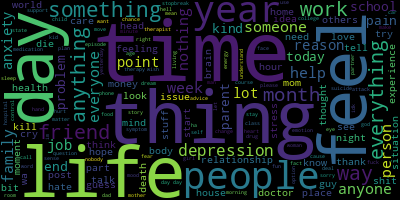

In [42]:
wc.to_image()

In [43]:
str_list=[]
for i in df["noun_tag"]:
  str_list.append(" ".join(i))

In [44]:
str_list[0:11]

['gosh',
 'trouble mind heart tune',
 'forward doubt restless place',
 'focus something',
 'month mean',
 'break something heck',
 'feel family',
 'know',
 'day restless huh',
 'cry',
 'restless night']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
v1=CountVectorizer().fit_transform(str_list)

In [47]:
v1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
x_tr,x_test,y_tr,y_test=train_test_split(v1,df["status"],test_size=.2)

In [51]:
logit_mod=LogisticRegression().fit(x_tr,y_tr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
p=logit_mod.predict(x_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,p))

                      precision    recall  f1-score   support

             Anxiety       0.77      0.64      0.70       767
             Bipolar       0.72      0.63      0.67       543
          Depression       0.65      0.64      0.65      3123
              Normal       0.80      0.94      0.86      3268
Personality disorder       0.68      0.45      0.54       204
              Stress       0.56      0.42      0.48       510
            Suicidal       0.58      0.54      0.56      2122

            accuracy                           0.70     10537
           macro avg       0.68      0.61      0.64     10537
        weighted avg       0.69      0.70      0.69     10537



In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [56]:
y=LabelEncoder().fit_transform(df["status"])

In [57]:
x_tr,x_test,y_tr,y_test=train_test_split(v1, y, test_size=.2)

In [58]:
logit_mod2=LogisticRegression().fit(x_tr,y_tr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
p2_proba = logit_mod2.predict_proba(x_test)

In [60]:
len(y_test)

10537

In [62]:
len(p2_proba)

10537

In [63]:
auc = roc_auc_score(y_test, p2_proba, multi_class="ovr")

In [64]:
auc

np.float64(0.8995299072598444)